In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [548]:
# Parametersfor the benchmarking
fps=295
num_particles=1000
dt=1/fps
spatial_resolution=30E-06  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution

0.00021903148058823087


Generating initial x coordinates

In [549]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_trunc= sample_x_in_resol.astype(int)
# print(sample_x_trunc[:10])
sample_x_trunc_SI=sample_x_trunc.astype(float)*spatial_resolution
# print(sample_x_trunc_SI)
# print(sample_x_SI)

In [550]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

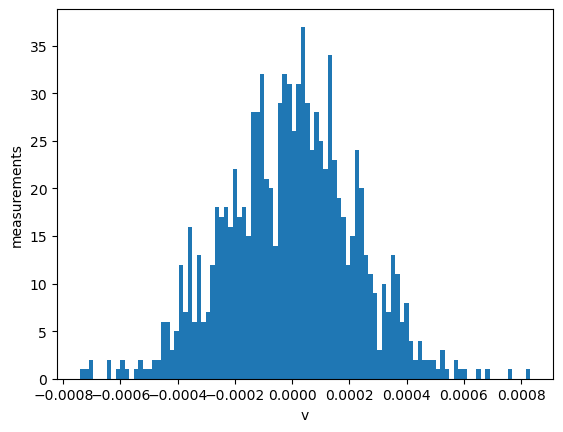

In [551]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Text(0, 0.5, 'measurements')

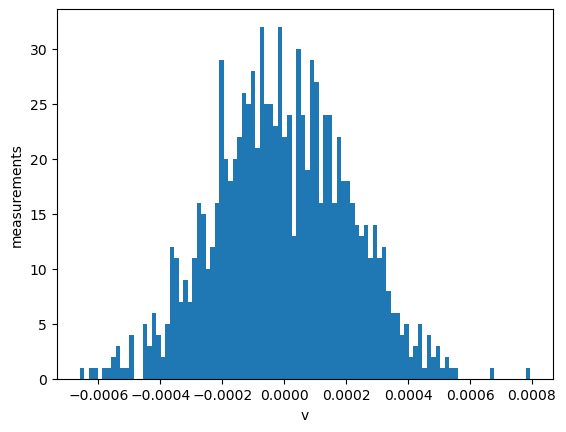

In [552]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

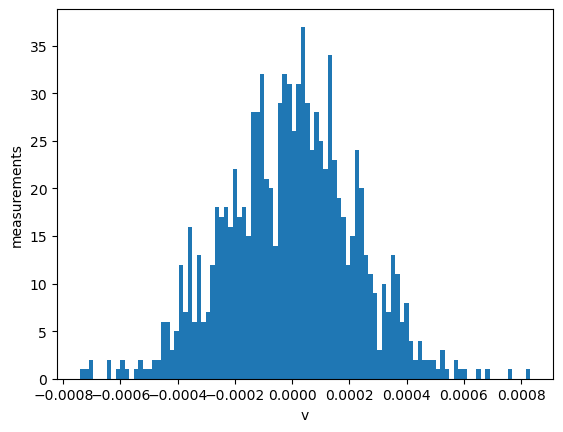

In [553]:
# Simulating the motion of the particles
x_forward=sample_x+sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
x_forward_trunc=x_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc.astype(float)*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

In [554]:
# Calculating restored velocities
v_restored=(x_forward_SI- sample_x_trunc_SI)/dt
print(v_restored)


print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

[ 0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.      -0.00885  0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.      -0.00885  0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0

Code to make the y coordinates

In [555]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_y = sts.uniform(left_SI, right_SI-left_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
# print(sample_x_trunc)
sample_y_trunc= sample_y_in_resol.astype(int)
# print(sample_x_trunc)
sample_y_trunc_SI=sample_y_trunc.astype(float)*spatial_resolution
# print(sample_y_trunc_SI
    #)
# print(sample_x_SI)

Text(0, 0.5, 'measurements')

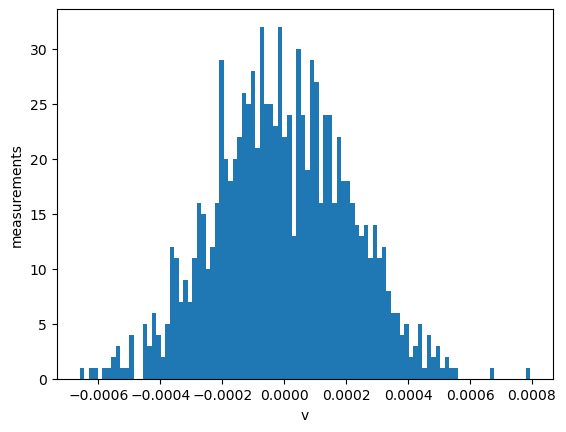

In [556]:
# Simulating the motion of the particles
y_forward=sample_y+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_trunc=y_forward_in_resol.astype(int)
# print(x_forward_trunc)
y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates

In [557]:
def make_coord_df(init_frame,final_frame, num_particles, init_x_trunc_SI, init_y_trunc_SI, sample_vx,sample_vy, dt,spatial_resolution):
    frame_data = []
    while init_frame <= final_frame:
        # Simulating the motion of the particles for x coordinates
        x_forward = init_x_trunc_SI + sample_vx * dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype(int)
        x_forward_SI = x_forward_trunc.astype(float) * spatial_resolution

        # Simulating the motion of the particles for y coordinates
        y_forward = init_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype(int)
        y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- init_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- init_y_trunc_SI)/dt

        for j in range(num_particles):
            # Append the data for the current frame
            frame_data.append([init_x_trunc_SI[j], init_y_trunc_SI[j], j,sample_vx[j],sample_vy[j],v_restored_x[j],v_restored_y[j],init_frame])
        
        # Update the initial positions for the next frame
        init_x_trunc_SI = x_forward_SI
        init_y_trunc_SI = y_forward_SI
        init_frame += 1
    # Create a DataFrame
    x_y_df = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no', 'vx (unrestored)','vy (unrestored)','vx(restored)','vy(restored)','frame'])
    return x_y_df


In [583]:
coord_df=make_coord_df(1,2, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, dt,spatial_resolution)
print(coord_df[coord_df['frame'] == 1]['vx (unrestored)'])

0      0.000101
1      0.000136
2      0.000235
3     -0.000387
4     -0.000108
         ...   
995   -0.000242
996    0.000085
997    0.000106
998    0.000001
999   -0.000149
Name: vx (unrestored), Length: 1000, dtype: float64


Function to get the discrepancies

In [559]:
def get_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [560]:
get_discrepancies(v_restored,sample_vx)

204.30895525369573

Function to create the database of velocities

In [610]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    init_frame=1
    final_frame=2 #using it as 2 now will parametrise it when making a general function
    dt=1/fps
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
    unif_x = sts.uniform(left_SI, right_SI-left_SI)
    sample_x=unif_x.rvs(num_particles)
    sample_x_in_resol= sample_x/spatial_resolution
    sample_x_trunc= sample_x_in_resol.astype(int)
    sample_x_trunc_SI=sample_x_trunc*spatial_resolution
    
    unif_y = sts.uniform(down_SI, up_SI-down_SI)
    sample_y=unif_y.rvs(num_particles)
    sample_y_in_resol= sample_y/spatial_resolution
    sample_y_trunc= sample_y_in_resol.astype(int)
    sample_y_trunc_SI=sample_y_trunc*spatial_resolution
    # Generate a sample of 1000 random velocities from a normal distribution
    norm_rv = sts.norm(mu, sigma)
    sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
    norm_rv = sts.norm(mu, sigma)
    sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
    
    # # Simulating the motion of the particles for x coordinates
    # x_forward = sample_x_trunc_SI + sample_vx * dt
    # x_forward_in_resol = x_forward / spatial_resolution
    # x_forward_trunc = x_forward_in_resol.astype(int)
    # x_forward_SI = x_forward_trunc.astype(float) * spatial_resolution

    # # Simulating the motion of the particles for y coordinates
    # y_forward = sample_y_trunc_SI + sample_vy * dt
    # y_forward_in_resol = y_forward / spatial_resolution
    # y_forward_trunc = y_forward_in_resol.astype(int)
    # y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution

    # # Calculating restored velocities
    # v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
    # v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
    coord_df=make_coord_df(init_frame,final_frame, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, dt,spatial_resolution)
    return coord_df

In [611]:
coord_df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)

# print(coord_df['vx (unrestored)'].mean())
# print(coord_df['vx(restored)'].mean())

# print(np.abs((coord_df['vx (unrestored)'].mean()-coord_df['vx(restored)'].mean())/coord_df['vx (unrestored)'].mean()))


In [618]:
print(coord_df.head())

         x        y  part_no  vx (unrestored)  vy (unrestored)  vx(restored)  \
0  0.01434  0.00516        0        -0.000201        -0.000111      -0.00885   
1  0.03189  0.03096        1         0.000047        -0.000326       0.00000   
2  0.04878  0.02094        2         0.000446         0.000134       0.00000   
3  0.04107  0.04152        3        -0.000539        -0.000139      -0.00885   
4  0.01350  0.00885        4         0.000225        -0.000105       0.00000   

   vy(restored)  frame  
0      -0.00885      1  
1      -0.00885      1  
2       0.00000      1  
3      -0.00885      1  
4      -0.00885      1  


In [609]:
fps_arr=[100,200,300,400,800,1600,3200]
disc_arr=[]

for i in fps_arr:
    # print(coord_df['vx (unrestored)'].mean())
    # print(coord_df['vx(restored)'].mean())
    disc=get_discrepancies(coord_df['vx(restored)'],coord_df['vx (unrestored)'])/100
    # disc=(np.abs((coord_df['vx (unrestored)'].mean()-coord_df['vx(restored)'].mean())/coord_df['vx (unrestored)'].mean()))
    np.append(disc_arr,disc)
    print(disc)


191.54970145050353
191.54970145050353
191.54970145050353
191.54970145050353
191.54970145050353
191.54970145050353
191.54970145050353
